## Importing the Libraries

In [33]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we create

# Read data
df = pd.read_csv(r'C:/Users/R/Downloads/archive/movies.csv')

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning up the data

In [35]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} = {}%'.format(col, pct_missing))

name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


Data types for our columns

In [36]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Converting the any floating types to integer types

In [37]:
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [38]:
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [39]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [40]:
pd.set_option('display.max_rows', None)

Dropping off any duplicates

In [41]:
df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

# Correlation of the Data

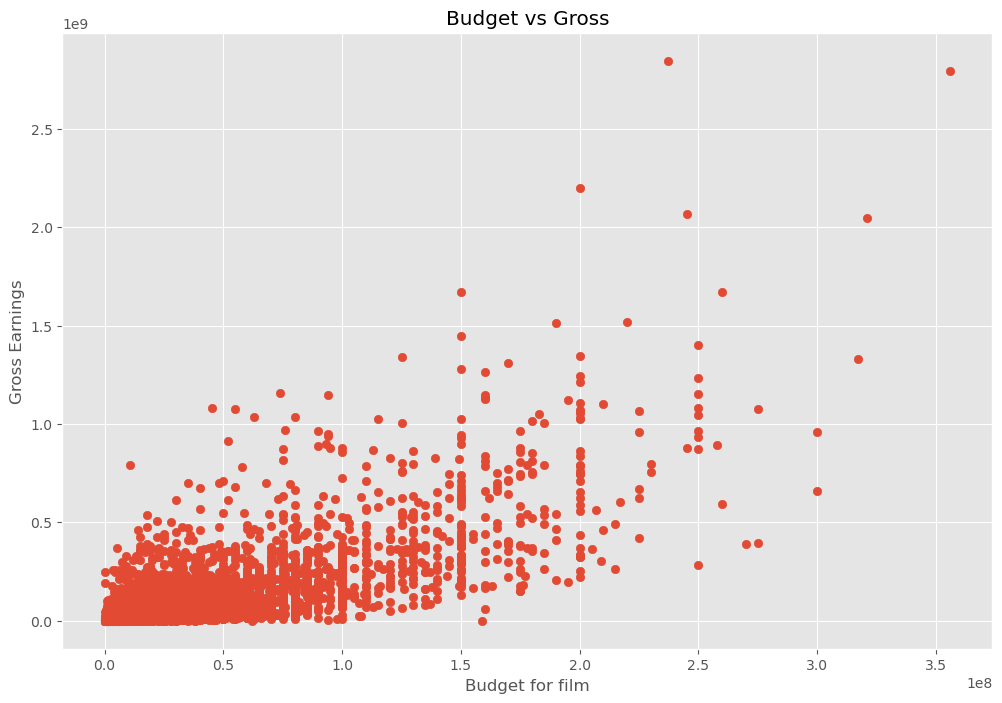

In [42]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel("Budget for film")
plt.ylabel("Gross Earnings")
plt.show()

Plot **budget vs gross** using seaborn

<Axes: xlabel='budget', ylabel='gross'>

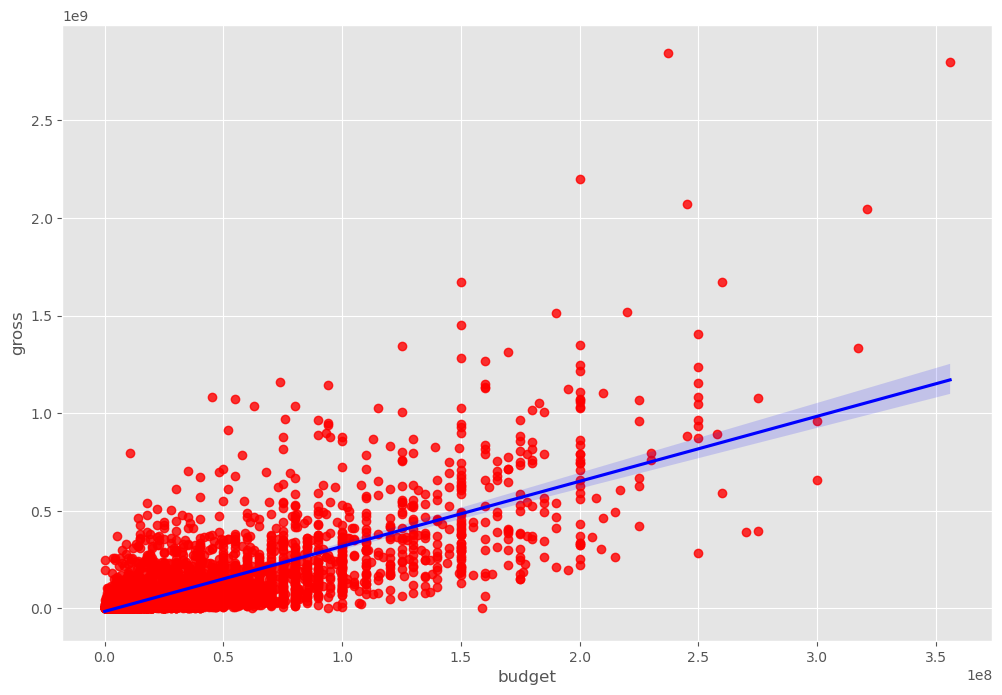

In [43]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

A Look at correlation

In [44]:
df.corr(numeric_only=True, method="pearson")
# default type is the pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


- df.corr(numeric_only=True, method="kendall")
- df.corr(numeric_only=True, method="spearman")

**High correlation is there between budget and gross earnings as we can see a correlation value of 0.74**

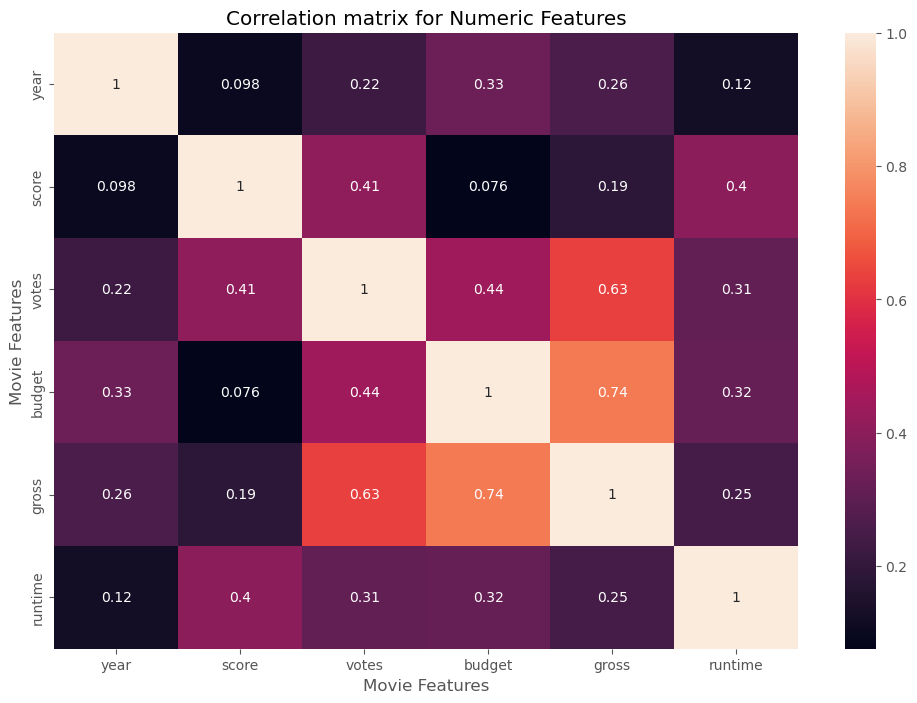

In [45]:
correlation_matrix = df.corr(numeric_only=True, method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [46]:
df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes


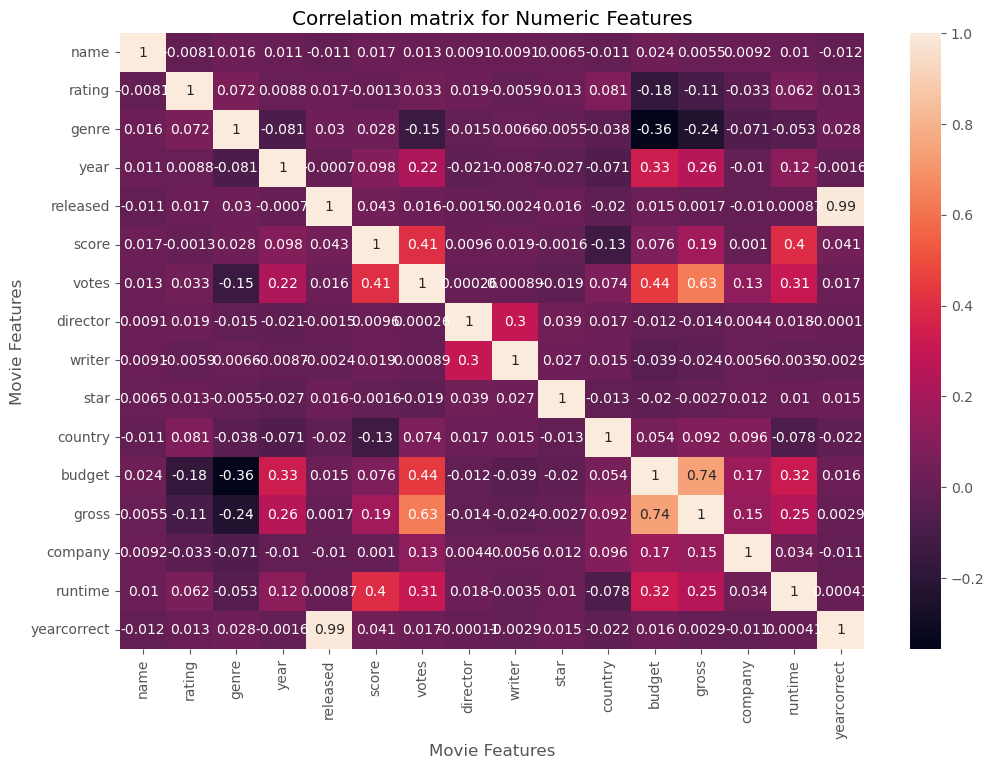

In [47]:
correlation_matrix = df_numerized.corr(numeric_only=True, method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [48]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [49]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.356564
budget  genre    -0.356564
genre   gross    -0.235650
gross   genre    -0.235650
budget  rating   -0.176002
dtype: float64

In [50]:
high_corr = sorted_pairs[(sorted_pairs>0.5)]
high_corr.head()

votes        gross       0.630757
gross        votes       0.630757
             budget      0.740395
budget       gross       0.740395
yearcorrect  released    0.993694
dtype: float64

# Conclusion
- From the above analysis we conclude that budget have the highest correlation to gross
- Company has lowest correlation to gross